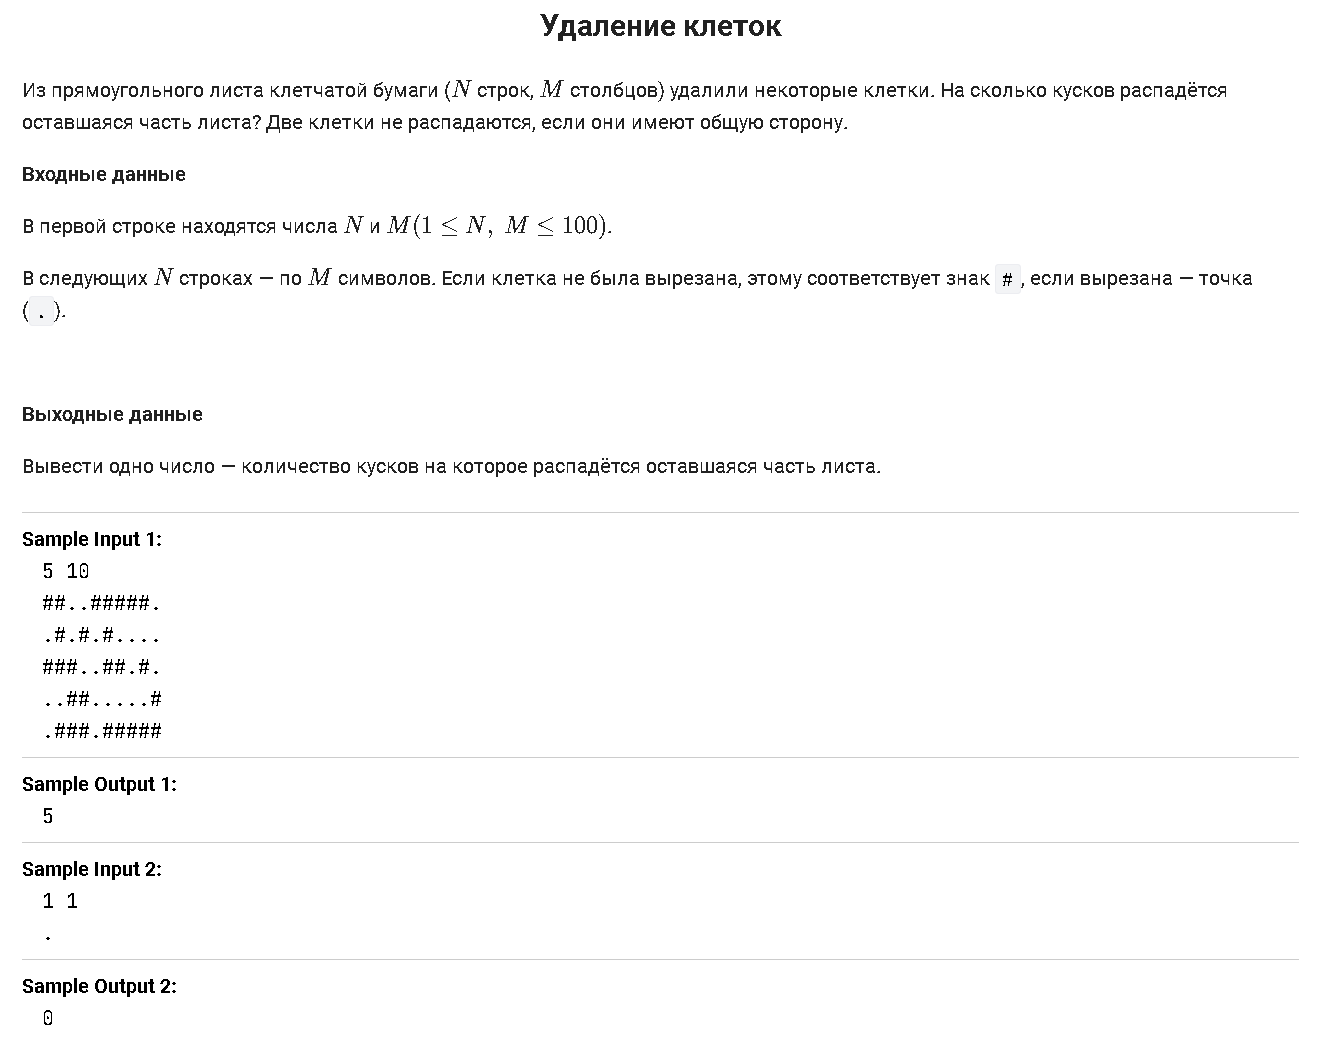

In [1]:
class Cell:
    def __init__(self, available: str):
        self.available = 1 if available == '#' else 0
        self.visited = False
        self.x = None
        self.y = None

    def __repr__(self):
        return f"x:{self.x} y:{self.x} available:{self.available} visited:{self.visited}"


filename = "cell_removal_input_1.txt"
with open(filename, encoding="utf-8") as src:
    n, m = map(int, src.readline().split())
    sheet = [[Cell(symbol) for symbol in src.readline()] for _ in range(n)]


# Add frame
for i in range(n):
    sheet[i] = [Cell('.')] + sheet[i] + [Cell('.')]
sheet = [[Cell('.') for _ in range(m+2)]] + sheet
sheet = sheet + [[Cell('.') for _ in range(m+2)]]

# Add coords
for x in range(len(sheet)):
    for y in range(len(sheet[x])):
        sheet[x][y].x = x
        sheet[x][y].y = y

# Add arrays of shifts
dx = [0, 0, 1, -1]
dy = [1, -1, 0, 0]

# DFS via Stack
def dfs(sheet, dx, dy, cell):
    cell.visited = True
    
    stack = []
    for i in range(len(dx)):
        neigh = sheet[cell.x + dx[i]][cell.y + dy[i]]
        if neigh.available and not neigh.visited:
            stack.append(neigh)
            
            while len(stack) != 0:
                from_cell = stack.pop()
                from_cell.visited = True
                
                for i in range(len(dx)):
                    next_cell = sheet[from_cell.x + dx[i]][from_cell.y + dy[i]]
                    
                    if next_cell.available and not next_cell.visited:
                        stack.append(next_cell)
                        
n_components = 0
for x in range(1, len(sheet) - 1):
    for y in range(1, len(sheet[x]) - 1):
        cell = sheet[x][y]
        if cell.available and not cell.visited:
            n_components += 1
            dfs(sheet, dx, dy, cell)

print(n_components)

5
